# Multiple Linear Regression
## Bike Sharing Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [387]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [388]:
import numpy as np
import pandas as pd

In [389]:
bike = pd.read_csv("day.csv")

In [390]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [391]:
bike.shape

(730, 16)

In [392]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [393]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data Preparation

- You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building.

- It is mentioned wrong in Data Dictionary for season according to the seasonal months:
##### Wrong => season : season (1:spring, 2:summer, 3:fall, 4:winter)
##### Correct => season : season (1:winter, 2:spring, 3:summer, 4:fall)

In [394]:
# Applying the function to the season list
bike['season'] = bike['season'].map({1:'winter', 2:'spring', 3:'summer', 4:'fall'})

In [395]:
# Applying the function to the weathersit list
bike['weathersit'] = bike['weathersit'].map({1:'clear', 2:'mist', 3:'lightsnow', 4:'heavyrain'})

In [396]:
# Check the bike dataframe now

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,winter,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,winter,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,winter,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,winter,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,winter,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [397]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

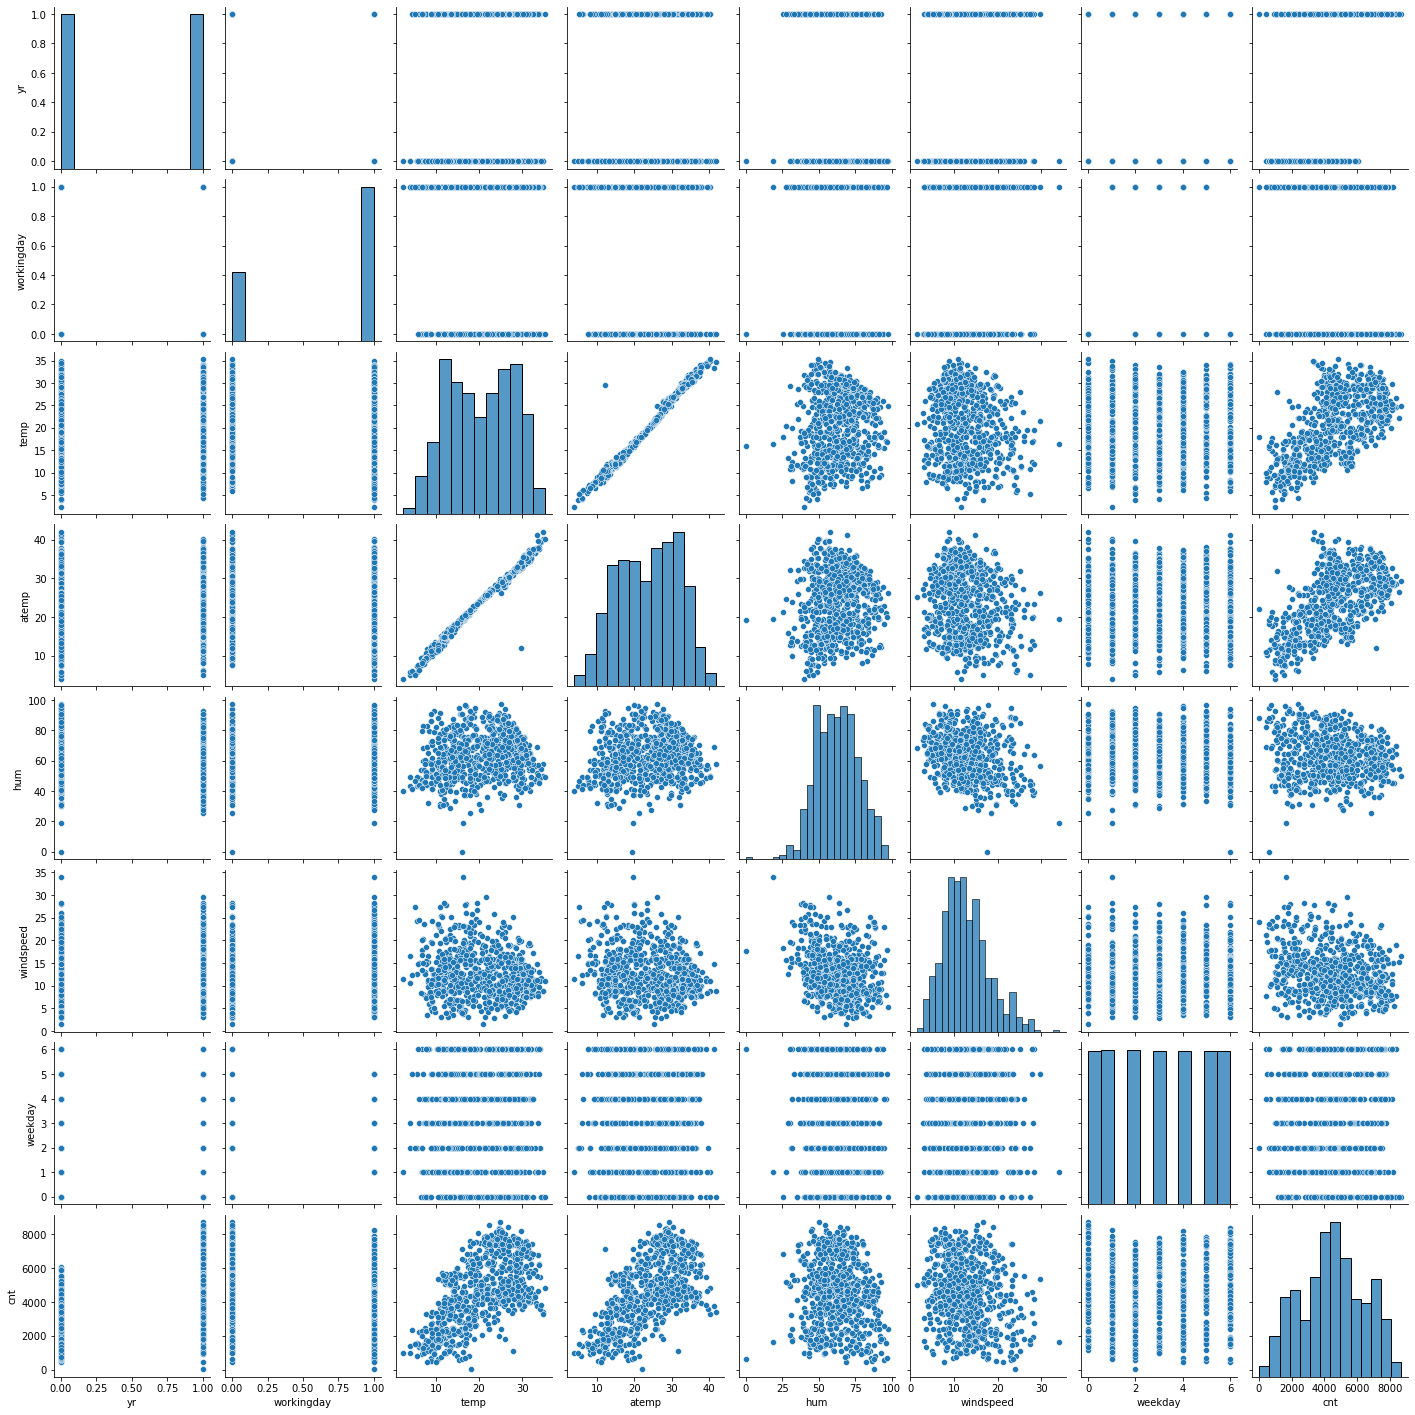

In [398]:
sns.pairplot(bike[['yr','workingday','temp','atemp','hum','windspeed','weekday','cnt']])
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

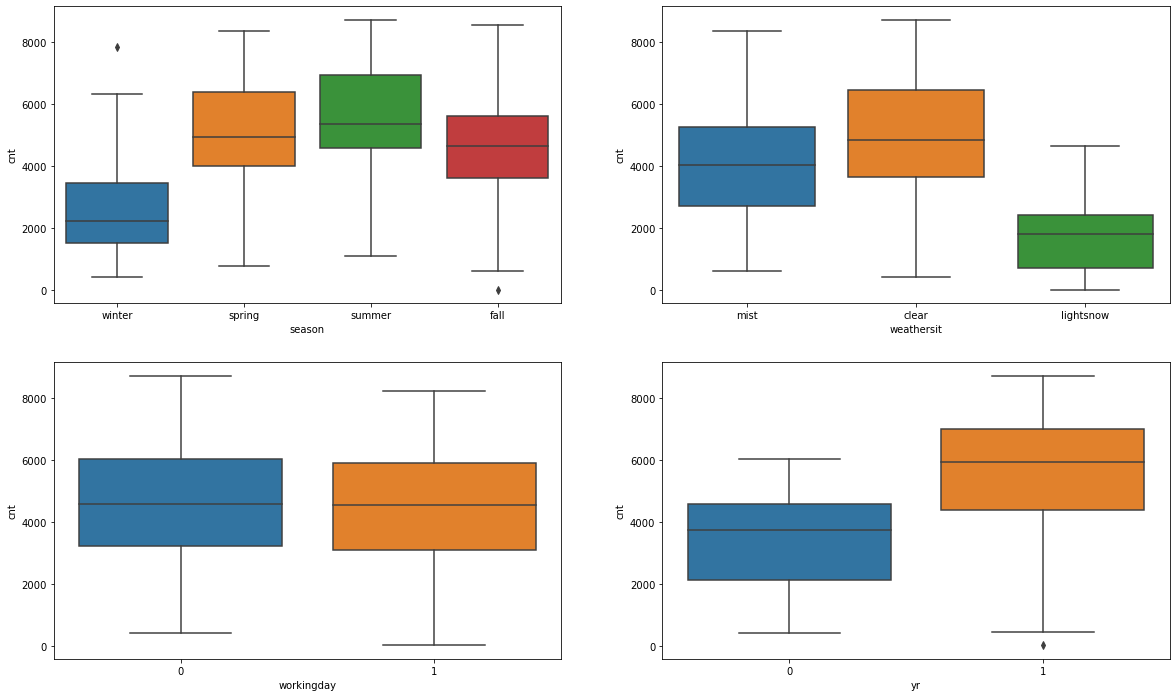

In [399]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,2,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,2,4)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `season` and `weathersit` with `yr` as the hue.

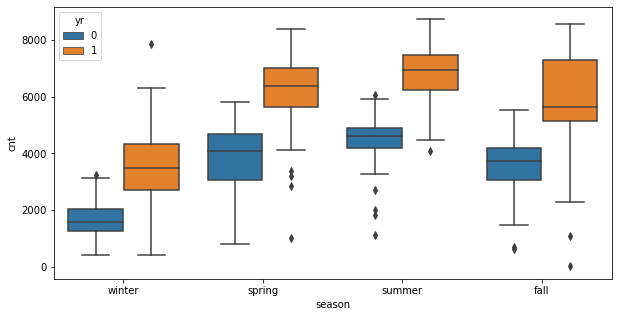

In [400]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = bike)
plt.show()

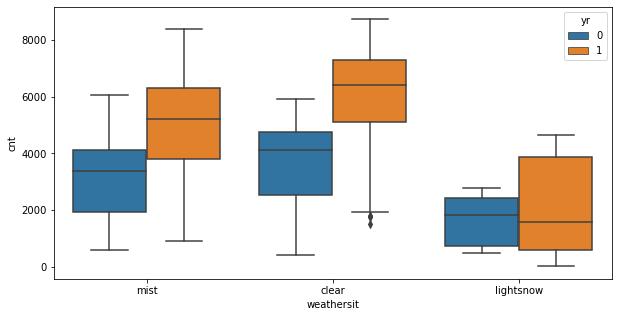

In [401]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = bike)
plt.show()

## So it is clear from above visualisation that Season wise Summer, Spring, Fall and Winter is the order of the season for which rental count decreases

## Also clear and misty weather boost the cycle rental

### Dummy Variables

The variable `season` and `weathersit`  has four levels. We need to convert these levels into integer as well.d 
For this, we will use something called `dummy variables`.

In [402]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'
status = pd.get_dummies(bike['season'])

In [403]:
# Check what the dataset 'status' looks like
status.head()

,fall,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


Now, you don't need four columns. You can drop the `fall` column, as the type of season can be identified with just the last three columns where — 
- `000` will correspond to `fall`
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [404]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(bike['season'], drop_first = True)

In [405]:
# Check what the dataset 'status' looks like
status.head()

,spring,summer,winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [406]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, status], axis = 1)

In [407]:
# Now let's see the head of our dataframe.

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,1,01-01-2018,winter,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1
1,2,02-01-2018,winter,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1
2,3,03-01-2018,winter,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1
3,4,04-01-2018,winter,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1
4,5,05-01-2018,winter,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1


In [408]:
# Drop 'season' as we have created the dummies for it

bike.drop(['season'], axis = 1, inplace = True)

In [409]:
bike.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,1,01-01-2018,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1
1,2,02-01-2018,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1
2,3,03-01-2018,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1
3,4,04-01-2018,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1
4,5,05-01-2018,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1


In [410]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status1'
status1 = pd.get_dummies(bike['weathersit'])

In [411]:
# Check what the dataset 'status1' looks like
status1.head()

,clear,lightsnow,mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


Now, you don't need threee columns. You can drop the `clear` column, as the type of season can be identified with just the last two columns where — 
- `00` will correspond to `Clear, Few clouds, Partly cloudy, Partly cloudy`
- `10` will correspond to `Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist`
- `01` will correspond to `Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds`

In [412]:
# Let's drop the first column from status1 df using 'drop_first = True'

status1 = pd.get_dummies(bike['weathersit'], drop_first = True)

In [413]:
# Check what the dataset 'status1' looks like
status1.head()

,lightsnow,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [414]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, status1], axis = 1)

In [415]:
# Now let's see the head of our dataframe.

bike.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,lightsnow,mist
0,1,01-01-2018,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1,0,1
1,2,02-01-2018,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1,0,1
2,3,03-01-2018,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,4,04-01-2018,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,5,05-01-2018,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [416]:
# Drop 'season' as we have created the dummies for it

bike.drop(['weathersit'], axis = 1, inplace = True)

In [417]:
bike.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,lightsnow,mist
0,1,01-01-2018,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1,0,1
1,2,02-01-2018,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1,0,1
2,3,03-01-2018,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,4,04-01-2018,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,5,05-01-2018,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [418]:
# Dropping other insignificant columns
bike.drop(['instant','dteday','mnth','holiday','weekday','casual','registered'], axis = 1, inplace = True)

In [419]:
# Now let's see the head of our dataframe.

bike.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightsnow,mist
0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,1,0,1
1,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,1,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0


In [420]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   workingday  730 non-null    int64  
 2   temp        730 non-null    float64
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  lightsnow   730 non-null    uint8  
 11  mist        730 non-null    uint8  
dtypes: float64(4), int64(3), uint8(5)
memory usage: 43.6 KB


In [421]:
bike.describe()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightsnow,mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.252055,0.257534,0.246575,0.028767,0.336986
std,0.500343,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.434490,0.437576,0.431313,0.167266,0.473004
min,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [422]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [423]:
from sklearn.preprocessing import MinMaxScaler

In [424]:
scaler = MinMaxScaler()

In [425]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [426]:
df_train.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightsnow,mist
653,1,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,0
576,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,1,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,1


In [427]:
df_train.describe()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightsnow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.243137,0.029412,0.343137
std,0.500429,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.429398,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


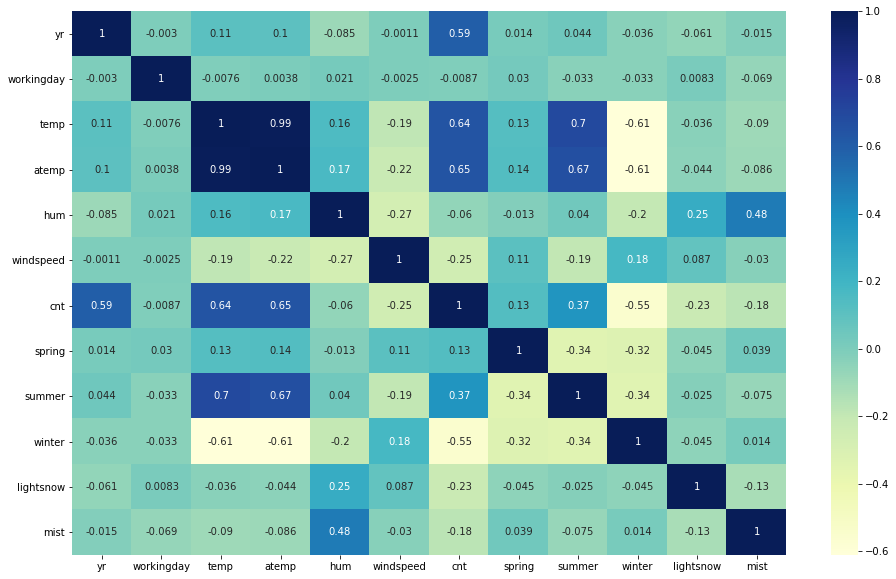

In [428]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `atemp`,`temp`,`yr`,`summer` seems to the correlated to `cnt` the most. Let's see a pairplot for `atemp`,`temp`,`yr`,`summer` vs `cnt`.

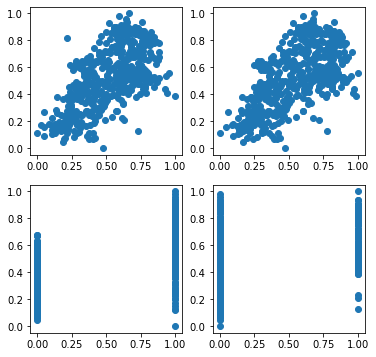

In [429]:
plt.figure(figsize=[6,6])
plt.subplot(2,2,1)
plt.scatter(df_train.atemp, df_train.cnt)
plt.subplot(2,2,2)
plt.scatter(df_train.temp, df_train.cnt)
plt.subplot(2,2,3)
plt.scatter(df_train.yr, df_train.cnt)
plt.subplot(2,2,4)
plt.scatter(df_train.summer, df_train.cnt)
plt.show()

So, we pick `atemp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [430]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [431]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [432]:
# Check the parameters obtained
lr.params

const    0.162924
atemp    0.683633
dtype: float64

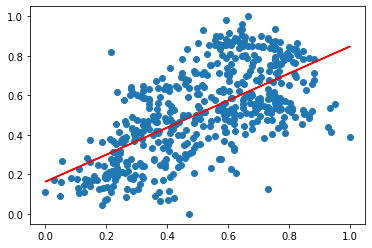

In [433]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.684*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [434]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           1.10e-61
Time:                        01:14:06   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

### Adding another variable

The R-squared value obtained is `0.418`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `temp`.

In [435]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'yr']]

In [436]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072104
atemp    0.625241
yr       0.237817
dtype: float64

In [437]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          1.07e-131
Time:                        01:14:06   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

We could see that there is significant improvement in the model as the value of adjusted R-squared as its value has gone up to `0.696` from `0.418`.
Let's go ahead and add another variable, `summer`.

In [438]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'yr','summer']]

In [439]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.052524
atemp     0.687133
yr        0.236802
summer   -0.044355
dtype: float64

In [440]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     393.3
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          8.89e-132
Time:                        01:14:07   Log-Likelihood:                 345.39
No. Observations:                 510   AIC:                            -682.8
Df Residuals:                     506   BIC:                            -665.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0525      0.017      3.158      0.0

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [441]:
# Check all the columns of the dataframe

bike.columns

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'lightsnow', 'mist'],
      dtype='object')

In [442]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.383001
yr            0.231103
workingday   -0.010936
temp          0.439645
atemp         0.060406
hum          -0.138331
windspeed    -0.181657
spring       -0.043169
summer       -0.085616
winter       -0.162818
lightsnow    -0.237244
mist         -0.053263
dtype: float64

In [443]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.0
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          6.50e-180
Time:                        01:14:08   Log-Likelihood:                 481.58
No. Observations:                 510   AIC:                            -939.2
Df Residuals:                     498   BIC:                            -888.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3830      0.031     12.173      0.0

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [444]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [445]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,387.28
3,atemp,365.46
4,hum,18.40
7,summer,4.51
5,windspeed,4.39
1,workingday,3.42
6,spring,2.41
10,mist,2.21
0,yr,2.04
8,winter,2.04


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `atemp` as it has a very high p-value of `0.678`. Let's go ahead and drop this variables

In [446]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('atemp', 1,)

In [447]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [448]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.6
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          4.52e-181
Time:                        01:14:08   Log-Likelihood:                 481.49
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     499   BIC:                            -894.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3838      0.031     12.233      0.0

In [449]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,21.22
3,hum,18.09
6,summer,4.35
4,windspeed,4.24
1,workingday,3.39
5,spring,2.41
9,mist,2.20
0,yr,2.04
7,winter,2.03
8,lightsnow,1.21


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `workingday` has a high p-value (`0.255`) as well. Hence, this variable isn't of much use and should be dropped.

In [450]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('workingday', 1)

In [451]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [452]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.3
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          5.20e-182
Time:                        01:14:10   Log-Likelihood:                 480.83
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     500   BIC:                            -899.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3772      0.031     12.230      0.0

In [453]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,21.19
2,hum,16.41
5,summer,4.35
3,windspeed,4.18
4,spring,2.41
8,mist,2.15
0,yr,2.04
6,winter,2.03
7,lightsnow,1.20


### Dropping the variable and updating the model

We can still see some of them have a high VIF `temp` for instance, has a VIF of 21.9. We should drop this variable as well.

In [454]:
X = X.drop('temp', 1)

In [455]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [456]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     189.8
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          2.60e-146
Time:                        01:14:11   Log-Likelihood:                 393.96
No. Observations:                 510   AIC:                            -769.9
Df Residuals:                     501   BIC:                            -731.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5108      0.035     14.676      0.0

In [457]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,6.86
2,windspeed,4.02
0,yr,1.96
3,spring,1.94
4,summer,1.94
7,mist,1.91
5,winter,1.90
6,lightsnow,1.15


We can see, the VIFs and p-values are high for factor 'hum' so we can go ahead and drop that variable.

### Dropping the variable and updating the model

We can still see some of them have a high VIF `hum` for instance, has a VIF of 6.86 and high p-value of 0.89. We should drop this variable as well.

In [458]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('hum', 1)

In [459]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [460]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     217.3
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          1.71e-147
Time:                        01:14:12   Log-Likelihood:                 393.95
No. Observations:                 510   AIC:                            -771.9
Df Residuals:                     502   BIC:                            -738.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5068      0.015     33.794      0.0

In [461]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.23
0,yr,1.82
4,winter,1.78
2,spring,1.73
3,summer,1.51
6,mist,1.42
5,lightsnow,1.06


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [462]:
y_train_pred = lr_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

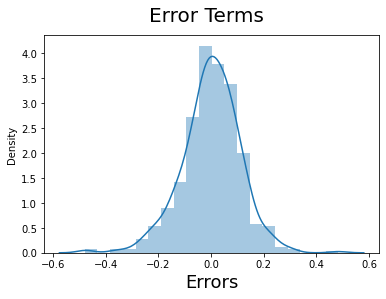

In [463]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [464]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightsnow,mist
184,0,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,0,1
535,1,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,0,0
299,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,1
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,0,0
152,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,0,0


In [465]:
df_test.describe()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightsnow,mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,0.255708,0.027397,0.319635
std,0.500722,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,0.437258,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [466]:
y_test = df_test.pop('cnt')
X_test = df_test

In [467]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)

In [468]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m5 = X_test_m5.drop(["atemp", "workingday", "temp","hum"], axis = 1)

In [469]:
# Making predictions using the fourth model

y_pred_m5 = lr_5.predict(X_test_m5)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

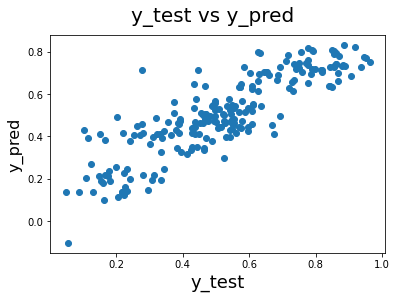

In [470]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ cnt = 0.247  \times  yr + 0.03  \times  spring + 0.09 \times summer - 0.177 \times windspeed - 0.227 \times winter - 0.288 \times lightsnow - 0.086 \times mist $


In [471]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m5)

0.7352449894722234

## Splitting the Data into Training and Testing Sets for RFE

In [472]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train_rfe, df_test_rfe = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [473]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [474]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train_rfe[num_vars] = scaler.fit_transform(df_train_rfe[num_vars])

df_train_rfe.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightsnow,mist
653,1,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,0
576,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,1,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,1


### Dividing into X and Y sets for the model building

In [475]:
y_train_rfe = df_train_rfe.pop('cnt')
X_train_rfe = df_train_rfe

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [476]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [477]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train_rfe, y_train_rfe)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train_rfe, y_train_rfe)

In [478]:
list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('lightsnow', True, 1),
 ('mist', True, 1)]

In [479]:
col = X_train_rfe.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       'lightsnow', 'mist'],
      dtype='object')

In [480]:
X_train_rfe.columns[~rfe.support_]

Index(['workingday'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [481]:
# Creating X_train dataframe with RFE selected variables
X_train_rfenew = X_train_rfe[col]

In [482]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfenew = sm.add_constant(X_train_rfenew)

In [483]:
lm = sm.OLS(y_train_rfe,X_train_rfenew).fit()   # Running the linear model

In [484]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.9
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          8.14e-181
Time:                        01:14:17   Log-Likelihood:                 480.89
No. Observations:                 510   AIC:                            -939.8
Df Residuals:                     499   BIC:                            -893.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3764      0.031     12.158      0.0

`atemp` is insignificant in presence of other variables; can be dropped

In [485]:
X_train_new = X_train_rfenew.drop(["atemp"], axis = 1)

Rebuilding the model without `atemp`

In [486]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [487]:
lm = sm.OLS(y_train_rfe,X_train_lm).fit()   # Running the linear model

In [488]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.3
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          5.20e-182
Time:                        01:14:17   Log-Likelihood:                 480.83
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     500   BIC:                            -899.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3772      0.031     12.230      0.0

In [489]:
X_train_new.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       'lightsnow', 'mist'],
      dtype='object')

In [490]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [491]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,21.19
2,hum,16.41
5,summer,4.35
3,windspeed,4.18
4,spring,2.41
8,mist,2.15
0,yr,2.04
6,winter,2.03
7,lightsnow,1.20


`temp` is insignificant due to high VIF; can be dropped

In [492]:
X_train_new1 = X_train_new.drop(["temp"], axis = 1)

Rebuilding the model without `temp`

In [493]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

In [494]:
lm = sm.OLS(y_train_rfe,X_train_lm).fit()   # Running the linear model

In [495]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     189.8
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          2.60e-146
Time:                        01:14:18   Log-Likelihood:                 393.96
No. Observations:                 510   AIC:                            -769.9
Df Residuals:                     501   BIC:                            -731.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5108      0.035     14.676      0.0

`hum` is insignificant due to high P-Value; can be dropped

In [496]:
X_train_new2 = X_train_new1.drop(["hum"], axis = 1)

Rebuilding the model without `hum`

In [497]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

In [498]:
lm = sm.OLS(y_train_rfe,X_train_lm).fit()   # Running the linear model

In [499]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     217.3
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          1.71e-147
Time:                        01:14:19   Log-Likelihood:                 393.95
No. Observations:                 510   AIC:                            -771.9
Df Residuals:                     502   BIC:                            -738.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5068      0.015     33.794      0.0

In [500]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.23
0,yr,1.82
4,winter,1.78
2,spring,1.73
3,summer,1.51
6,mist,1.42
5,lightsnow,1.06


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [501]:
y_train_pred_rfe = lm.predict(X_train_lm)

In [502]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

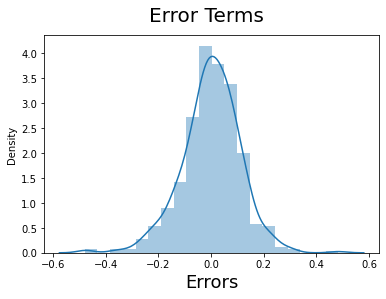

In [503]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_rfe - y_train_pred_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

Text(0, 0.5, 'Predicted Values')

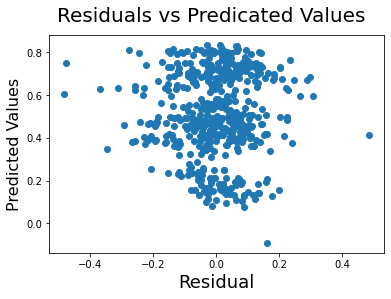

In [504]:
# Plotting residual and predicted values. to understand the spread.
fig = plt.figure()
plt.scatter(y_train_rfe - y_train_pred_rfe,y_train_pred_rfe)
fig.suptitle('Residuals vs Predicated Values', fontsize=20)              # Plot heading 
plt.xlabel('Residual', fontsize=18)                          # X-label
plt.ylabel('Predicted Values', fontsize=16) 

## Making Predictions

#### Applying the scaling on the test sets

In [505]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test_rfe[num_vars] = scaler.transform(df_test_rfe[num_vars])

#### Dividing into X_test and y_test

In [506]:
y_test_rfe = df_test_rfe.pop('cnt')
X_test_rfe = df_test_rfe

In [507]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test_rfe[X_train_new2.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [508]:
# Making predictions
y_pred_rfe = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

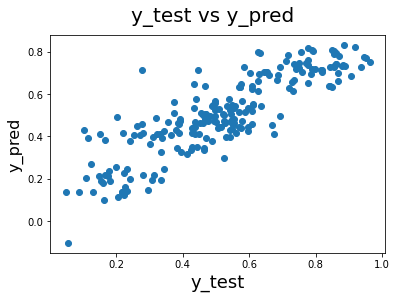

In [509]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_rfe,y_pred_rfe)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

## Best Fitted Line Equation


We can see that the equation of our best fitted line is:

$ cnt = 0.247  \times  yr + 0.03  \times  spring + 0.09 \times summer - 0.177 \times windspeed - 0.227 \times winter - 0.288 \times lightsnow - 0.086 \times mist $

## R2 Score from Manual removal of Factors

In [510]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m5)

0.7352449894722234

## R2 Score using RFE technique

In [511]:
from sklearn.metrics import r2_score
r2_score(y_test_rfe, y_pred_rfe)

0.7352449894722234